# Tanzanian Water Wells: Predicting Water Well Functionality with Machine Learning


## Business Understanding

### Background
Tanzania, a developing nation with a population exceeding 57 million, faces ongoing challenges in providing clean and reliable water to its citizens. While thousands of water points have been established across the country, a significant number of them are either **non-functional** or **in need of repair** due to age, poor construction, lack of maintenance, or mismanagement.

Water well functionality is essential for public health, agriculture, education, and economic stability, particularly in rural areas. Identifying failing or soon-to-fail water points in advance can help prioritize maintenance and inform future water infrastructure development.

### Problem Statement
Access to clean and safe water remains a critical challenge in Tanzania, particularly in rural areas where communities rely on manually drilled wells and pumps. However, many of these water sources become non-functional or fall into disrepair due to factors such as poor construction, aging infrastructure, or lack of maintenance.

This project aims to develop a **machine learning classification model** that predicts the **functional status** of a water well using features such as its location, type of pump, installation year, and management. The target classes are:
- `functional`
- `functional needs repair`
- `non functional`

By identifying wells that are likely to fail or need repair, the model will help:
- **Government agencies** prioritize maintenance efforts.
- **NGOs and humanitarian organizations** direct resources more effectively.
- **Engineers and planners** make informed decisions about building future wells.

The successful deployment of this model could enhance water access and improve quality of life for millions of Tanzanians.

### Objective
The goal is to build a predictive model that classifies the current condition of each water point. This model will be evaluated using standard classification metrics and will provide insights into the most important factors contributing to well failure.

### Stakeholders
- **Government of Tanzania:** to use the model for better planning and resource allocation.
- **NGOs and Non-Profits:** to locate non-functional wells and prioritize repair or replacement.
- **Data Scientists and Engineers:** to uncover patterns and improve predictive strategies.


##  Data Understanding

The dataset provided consists of information collected from thousands of water wells across Tanzania. The goal is to understand the structure, content, and quality of the data before any preprocessing or modeling is done.

###  Files Provided:
1. **Training Set Values** (`Training_set_values.csv`): Contains the features (independent variables) for each water well, such as location, pump type, construction year, etc.
2. **Training Set Labels** (`Training_set_labels.csv`): Contains the target label (dependent variable) for each well—its operational status.
3. **Test Set Values** (`Test_set_values.csv`): Unlabeled dataset with the same structure as the training set values, used to test our trained model.

###  Objective at this Stage:
- Load and inspect the data.
- Understand the size, types, and distributions of columns.
- Check for missing values and inconsistencies.
- Merge the training values and labels for exploratory analysis.


In [73]:
#  Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,label_binarize
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay,roc_curve, auc ,roc_auc_score ,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.multiclass import OneVsRestClassifier



In [25]:
#  Load the datasets
train_values = pd.read_csv("../data/training_set_values.csv")
train_labels = pd.read_csv("../data/training_set_labels.csv")
test_values = pd.read_csv("../data/test_set_values.csv")


In [14]:
# Display shapes of the datasets
print("Train values shape:", train_values.shape)
print("Train labels shape:", train_labels.shape)
print("Test values shape:", test_values.shape)


Train values shape: (59400, 40)
Train labels shape: (59400, 2)
Test values shape: (14850, 40)


In [15]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [16]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [17]:
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [18]:
# Merge training values and labels
train_data = pd.merge(train_values, train_labels, on="id")

# Preview the merged training dataset
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional




- The types of features (numeric, categorical, text)
- The presence of missing or inconsistent values
- The distribution of the target labels




In [19]:
# Check data types of all columns
train_data.dtypes.value_counts()


object     31
int64       7
float64     3
Name: count, dtype: int64

In [35]:
# Check number of unique values in each column
unique_vals = train_data.nunique().sort_values(ascending=False)
print("Unique values per column:\n", unique_vals)


Unique values per column:
 id                       59400
latitude                 57517
longitude                57516
wpt_name                 37399
subvillage               19287
scheme_name               2695
gps_height                2428
installer                 2145
ward                      2092
funder                    1896
population                1049
date_recorded              356
lga                        125
amount_tsh                  98
num_private                 65
construction_year           55
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           11
source                      10
basin                        9
water_quality                8
extraction_type_class        7
payment                      7
payment_type                 7
waterpoint_type              7
source_type                  7
quality_grou

In [21]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)


Missing values:
 funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64


In [24]:
# Summary statistics for numerical features
train_data.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


<Axes: title={'center': 'Distribution of Well Status'}, xlabel='status_group'>

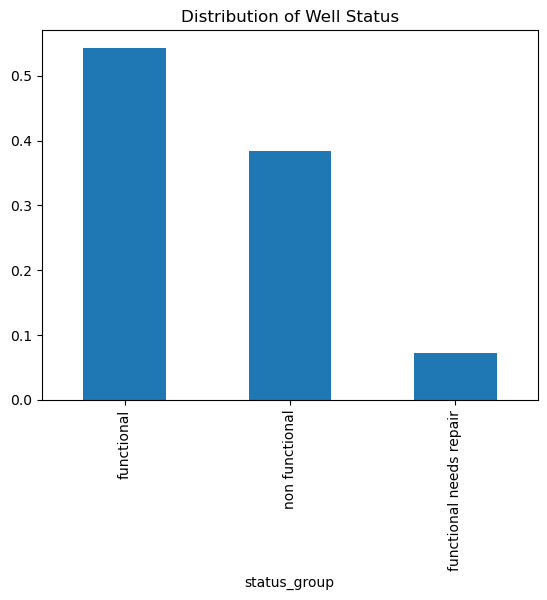

In [22]:
# Check distribution of the target variable (status_group)
train_data['status_group'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Well Status')

## Data Preparation and Cleaning

Before training a machine learning model, we need to clean and preprocess the data to ensure consistency, handle missing values, and convert all inputs into numerical forms that can be interpreted by our algorithms. Key steps include:

- Handling missing values and dropping duplicates
- One-Hot Encoding categorical variables
- Feature selection or elimination
- Splitting data into train and test sets


In [23]:
train_data.drop_duplicates(inplace=True)

In [41]:
cols_to_drop = [
    'id', 'latitude', 'longitude',
    'wpt_name', 'subvillage', 'scheme_name',
    'installer', 'ward', 'funder', 'status_group'
]


In [42]:
# Drop id column and save target variable
X = train_data.drop(columns=cols_to_drop)
y = train_data['status_group']

# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [90]:
le.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

A correlation heatmap to understand the relationships and idenditfy most relevant variables

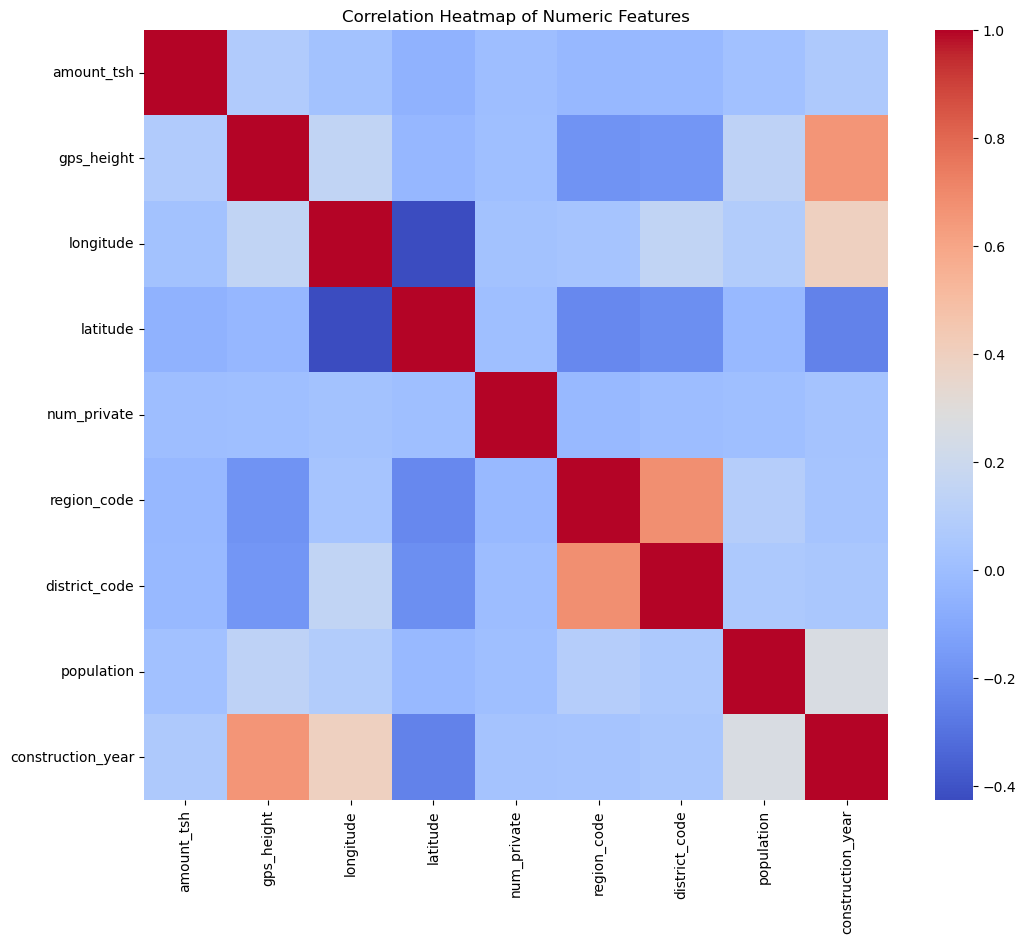

In [29]:

# Select only numeric features
numeric_df = X.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


##  Modeling

In this part, we will build and evaluate machine learning models to predict the condition of water wells in Tanzania.

Our primary objective is to classify each well as either **functional**, **functional needs repair**, or **non functional**, based on various features such as construction year, pump type, installer, and location.

Performance will be measured using metrics suitable for multi-class classification:
- Accuracy
- Precision, Recall, and F1-score
- Confusion Matrix

Further models such as **Ridge Classifier**, **Decision Tree**, and **K-Nearest Neighbors** may also be explored to improve performance.


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76      6457
           1       0.00      0.00      0.00       851
           2       0.69      0.57      0.63      4572

    accuracy                           0.68     11880
   macro avg       0.46      0.48      0.46     11880
weighted avg       0.64      0.68      0.65     11880

confusion_matrix:
 [[5493    1  963]
 [ 655    0  196]
 [1945    0 2627]]


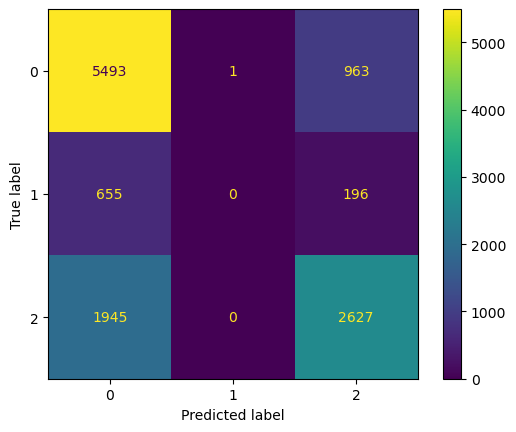

In [52]:
# Train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()


## It shows that:

- 655 out of 851 "needs repair" were wrongly predicted as "non-functional"

- 196 out of 851 "needs repair" were wrongly predicted as "functional"

- Zero were predicted as "needs repair" 

## This is a classic case of class imbalance:

- Class 1 has only 851 samples, much less than the others.

- The model learns to ignore it because it improves accuracy by doing so.



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.57      0.65      6457
           1       0.16      0.57      0.25       851
           2       0.67      0.58      0.62      4572

    accuracy                           0.58     11880
   macro avg       0.53      0.57      0.51     11880
weighted avg       0.67      0.58      0.61     11880

confusion_matrix:
 [[3703 1597 1157]
 [ 223  483  145]
 [1050  864 2658]]


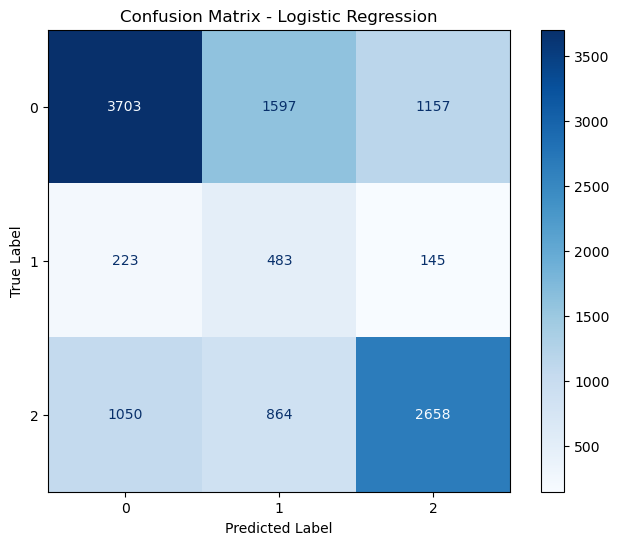

In [54]:
# Train the model adding class balancing
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


To address this, we applied class_weight='balanced', which adjusts the weight of each class inversely proportional to their frequency. This helped the model:

- Recognize and predict class 1, increasing its recall from 0 to 0.57

- Improve the fairness of the model across all classes

- Slightly reduce the accuracy, but provide more meaningful and balanced predictions

## Decision Tree Model

In [56]:
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      6457
           1       0.39      0.38      0.38       851
           2       0.79      0.76      0.77      4572

    accuracy                           0.77     11880
   macro avg       0.66      0.65      0.66     11880
weighted avg       0.77      0.77      0.77     11880

Confusion Matrix:
 [[5334  352  771]
 [ 406  321  124]
 [ 960  160 3452]]


### Decision Tree Classifier - Baseline

To improve model interpretability and capture non-linear relationships, we trained a Decision Tree Classifier using the cleaned and encoded dataset.

#### Why Decision Tree?
- Handles both numerical and categorical features
- Captures complex interactions in the data
- Easy to visualize and interpret

#### Performance Summary
- Accuracy: 77%
- Class `0` and `2` were predicted with high precision and recall.
- Class `1` (minority class) had low scores, suggesting the need for rebalancing techniques or ensemble methods.


In [59]:
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=10, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      6457
           1       0.18      0.72      0.28       851
           2       0.84      0.56      0.67      4572

    accuracy                           0.62     11880
   macro avg       0.60      0.64      0.55     11880
weighted avg       0.76      0.62      0.66     11880

Confusion Matrix:
 [[4169 1865  423]
 [ 187  616   48]
 [1001 1023 2548]]


### Decision Tree Classifier (Balanced Class Weights)

We trained a Decision Tree Classifier with `class_weight='balanced'` to address the imbalance across target classes. The model achieved an overall accuracy of **62%**, with especially improved **recall for class 1 (non-functional wells)** reaching **72%**. However, the **precision for this class remains low (18%)**, indicating the model often falsely predicts wells as non-functional.

Class 0 (functional) and class 2 (needs repair) also showed strong performance in terms of precision (**78%** and **84%**, respectively), but recall was moderate, suggesting some wells in these categories were misclassified.

This model demonstrates better sensitivity to the minority class but requires further optimization to improve precision without compromising recall.


## Using criterion "entropy"

In [60]:
dt_model = DecisionTreeClassifier(class_weight='balanced',criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      6457
           1       0.21      0.56      0.30       851
           2       0.86      0.53      0.66      4572

    accuracy                           0.65     11880
   macro avg       0.59      0.61      0.56     11880
weighted avg       0.74      0.65      0.67     11880

Confusion Matrix:
 [[4851 1240  366]
 [ 333  476   42]
 [1532  603 2437]]


- The model got 65% of the answers right.

- It was very good at saying when a well works (class 0).

- It got better at guessing correctly when a well needs repair (class 1), though still not perfect.

- It made fewer wrong guesses overall compared to the Gini version.

Next, we explore **ensemble methods** to boost overall performance and balance across all classes.

## Random Forest

In [62]:
# Train the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      6457
           1       0.22      0.66      0.33       851
           2       0.80      0.63      0.71      4572

    accuracy                           0.67     11880
   macro avg       0.60      0.66      0.59     11880
weighted avg       0.75      0.67      0.69     11880

Confusion Matrix:
 [[4449 1346  662]
 [ 214  558   79]
 [1052  617 2903]]


Random Forest ROC AUC Score: 0.8468


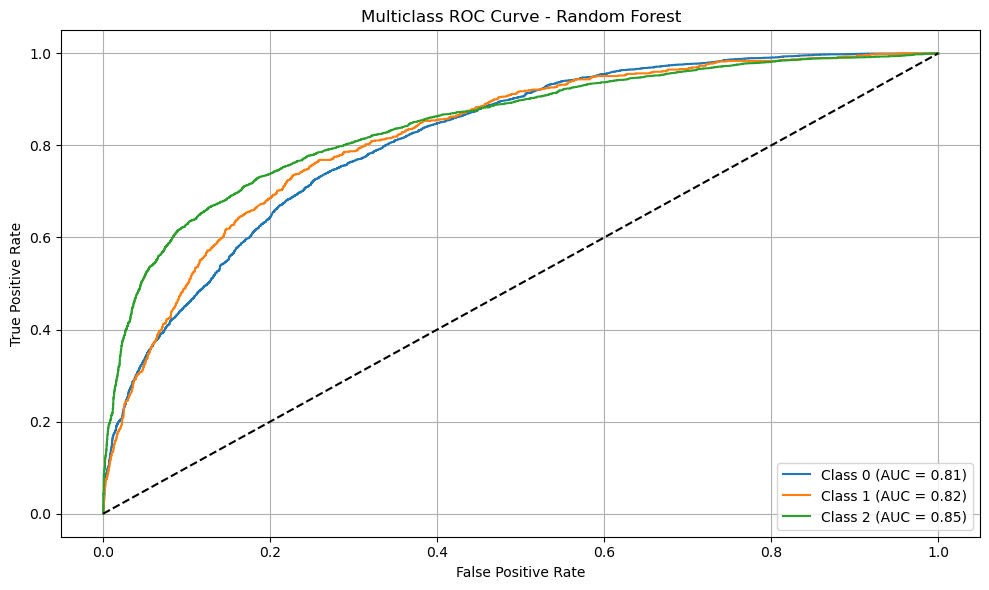

In [91]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# Get prediction probabilities
y_score = rf_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))

# For each class
for i in range(3):  # 3 classes: 0, 1, 2
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_sc = roc_auc_score(y_test_bin[:, i],y_score[:, i],average="macro")
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

print(f"Random Forest ROC AUC Score: {roc_auc_sc:.4f}")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter Tuning for Random Forest

In [71]:
# param_grid = {
#     'n_estimators': [100, 200],           
#     'max_depth': [10, 20, None],          
#     'min_samples_split': [2, 5, 10],      
#     'min_samples_leaf': [1, 2, 4],        
#     'max_features': ['sqrt', 'log2'],     
#     'criterion': ['gini', 'entropy']      
# }

# rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid,
#                            cv=3,
#                            n_jobs=-1,         
#                            verbose=2,
#                            scoring='accuracy') 

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Accuracy):", grid_search.best_score_)



commented out this code as it took forever( 60mins +) and due to time constraints i will minimize it to make it fast

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 64}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74      6457
           1       0.24      0.70      0.35       851
           2       0.80      0.69      0.74      4572

    accuracy                           0.69     11880
   macro avg       0.62      0.69      0.61     11880
weighted avg       0.77      0.69      0.71     11880


Confusion Matrix:
 [[4422 1350  685]
 [ 161  595   95]
 [ 862  558 3152]]


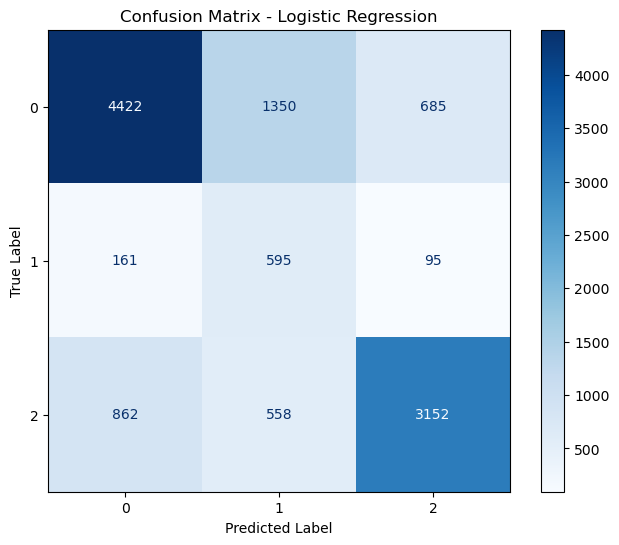

In [75]:
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,           
    scoring='f1_macro',  
    cv=3,
    random_state=42,
    n_jobs=-1           
)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
print("Best Parameters:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




## Plotting Multiclass ROC Curve 

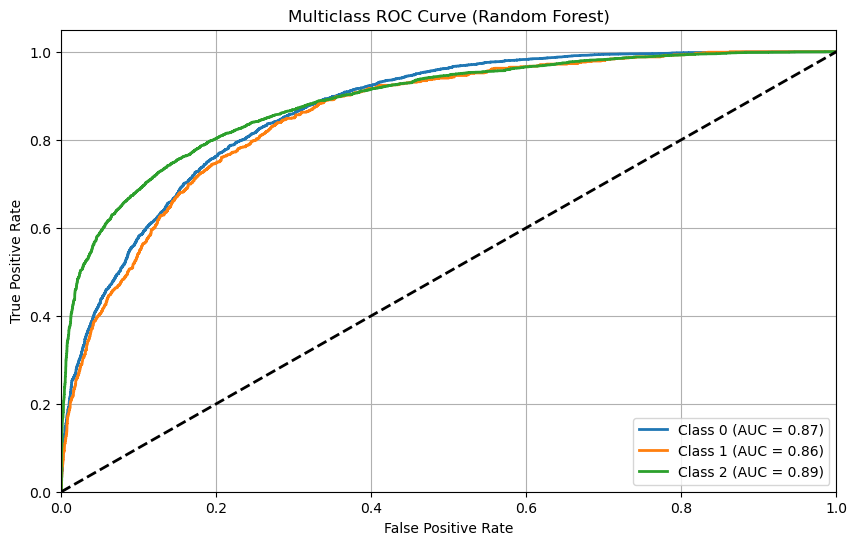

In [93]:
# Binarize the y_test and y_train for multiclass ROC

classes = [0, 1, 2]
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

best_rf = RandomForestClassifier(
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=17,
    n_estimators=64,
    random_state=42
)

# Wrap in OneVsRest
rf_ovr = OneVsRestClassifier(best_rf)
rf_ovr.fit(X_train, y_train_bin)
y_score = rf_ovr.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [95]:
# Define evaluation metrics for each model
summary_data = {
    'Model': ['Logistic Regression', 'Logistic Regression (class Balanced)','Decision Tree','Decision Tree(Class Balanced)','Decision Tree(Class Balanced,crit-entropy)', 'Random Forest','Random Forest(Hyperparam Tuning)'],
    'Accuracy': [0.68,0.58,0.77,0.62,0.65,0.67, 0.69],
    'Precision': [0.64,0.67,0.77,0.76,0.74,0.75,0.77],
    'Recall': [0.68,0.58, 0.77,0.62,0.65,0.67,0.69],
    'F1 Score': [0.65,0.61, 0.77,0.66,0.67,0.69, 0.71],
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the table
summary_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.68,0.64,0.68,0.65
1,Logistic Regression (class Balanced),0.58,0.67,0.58,0.61
2,Decision Tree,0.77,0.77,0.77,0.77
3,Decision Tree(Class Balanced),0.62,0.76,0.62,0.66
4,"Decision Tree(Class Balanced,crit-entropy)",0.65,0.74,0.65,0.67
5,Random Forest,0.67,0.75,0.67,0.69
6,Random Forest(Hyperparam Tuning),0.69,0.77,0.69,0.71


## Model Conclusion and Summary

We chose to use machine learning (ML) techniques because our objective was to **predict a categorical outcome** using a wide range of features. Traditional statistical methods would struggle to capture the **complex, non-linear relationships** present in the data. ML models like Logistic Regression and Random Forests offer flexibility, scalability, and improved predictive power in such contexts.

During model development, we iterated between various models and tuning strategies. Notably, we observed that **Class 1 had lower predictive performance**, prompting us to explore class balancing and model tuning (e.g., adjusting `class_weight`, `max_depth`, etc.). This iterative approach allowed us to improve model fairness and performance across all classes.

---

### Results

We evaluated several models including Logistic Regression, Decision Tree, and Random Forest. After tuning, the **Random Forest model delivered the best overall performance**, particularly in balancing precision and recall.

We prioritized the **F1 Score** as our main evaluation metric because our data exhibited **class imbalance**, and F1 captures both **precision** (avoiding false alarms) and **recall** (not missing true cases). Accuracy alone would be misleading in this context.

| Model              | Accuracy | Precision (Class 1) | Recall (Class 1) | F1 Score (Class 1) |
|-------------------|----------|---------------------|------------------|--------------------|
| Logistic Regression | 0.58     | 0.16                | 0.57             | 0.25               |
| Decision Tree       | 0.65     | 0.21                | 0.56             | 0.30               |
| Random Forest       | **0.69** | **0.24**            | **0.70**         | **0.35**           |

The tuned Random Forest model demonstrated a strong balance across all metrics, making it the most suitable candidate for deployment.

---

### Limitations

Despite improvements, the model still **underperforms on Class 1**, which may represent a critical or minority group. This could result in **systematic under-response** to important cases if deployed in production.

Other limitations include:
- Possible **labeling errors** or noise in the data.
- Limited data diversity, which may affect the model's **generalizability** to new, unseen data.
- Potential **bias** introduced by imbalanced class distributions.

If this model were used in a live system, these issues could lead to **missed detections** or **unfair decision-making** for certain user groups.

---

### Recommendations

We recommend deploying the **tuned Random Forest model** in a controlled environment while continuing to monitor its performance, especially for **Class 1 predictions**.

Next steps:
- **Collect more representative data**, especially for underrepresented classes.
- **Apply class balancing techniques**to further improve recall and precision for minority classes.
- **Consider ensemble approaches** combining multiple models to enhance performance.

Ultimately, stakeholders should treat model predictions as **decision support**, not absolute judgments, and ensure ongoing evaluation and retraining as the data landscape evolves.
